In [1]:
import pandas as pd
df1 = pd.read_excel("./DATA_DIEMTHI/data_pttk_1.xlsx")
# Save to CSV
df1.to_csv("./DATA_DIEMTHI/data_pttk_1.csv", index=False)


In [2]:
import pandas as pd
df2 = pd.read_excel("./DATA_DIEMTHI/data_pttk_2.xlsx")
# Save to CSV
df2.to_csv("./DATA_DIEMTHI/data_pttk_2.csv", index=False)

In [6]:
import pandas as pd
string_columns = ["msv",
{"header":"10%_1", "value": 0.1},
{"header":"10%_2", "value": 0.1},
{"header":"20%", "value": 0.2},
"score"
]
df1 = pd.read_csv("./DATA_DIEMTHI/data_pttk_1.csv")
df2 = pd.read_csv("./DATA_DIEMTHI/data_pttk_2.csv")
merge_df = pd.concat([df1, df2], ignore_index=True)
# Drop columns with all NaN values
merge_df = merge_df.dropna(axis=1, how='all')
# Drop rows with 0 values
merge_df = merge_df[(merge_df != 0).all(1)]
# Remove the last column
merge_df = merge_df.iloc[:, :-1]
# Use integer indices to access elements in the list
merge_df.columns = [string_columns[0],
string_columns[1]['header'],
string_columns[2]['header'],
string_columns[3]['header'],
string_columns[4]]
merge_df.to_csv("./DATA_DIEMTHI/data_pttk_1_2.csv", index=False)
merge_df
df3 = pd.read_csv("./DATA_DIEMTHI/data_pttk_3.csv")
df3.columns = [string_columns[0],
string_columns[1]['header'],
string_columns[2]['header'],
string_columns[3]['header'],
string_columns[4]]
df3.to_csv("./DATA_DIEMTHI/data_pttk_3_changed.csv", index=False)


In [7]:
import pandas as pd
string_columns = ["msv",
{"header":"10%_1", "value": 0.1},
{"header":"10%_2", "value": 0.1},
{"header":"20%", "value": 0.2},
"score"
]
df = pd.read_csv("./DATA_DIEMTHI/data_pttk_1_2.csv")
df3 = pd.read_csv("./DATA_DIEMTHI/data_pttk_3_changed.csv")
merge_df = pd.concat([df, df3], ignore_index=True)
merge_df.columns = [string_columns[0],
string_columns[1]['header'],
string_columns[2]['header'],
string_columns[3]['header'],
string_columns[4]]
merge_df.to_csv("./DATA_DIEMTHI/data_pttk.csv", index=False)
merge_df


,msv,10%_1,10%_2,20%,score
0,b1,9.00,7.00,6.00,6.00
1,b2,9.00,7.00,6.00,6.00
2,b3,10.00,9.00,7.00,7.25
3,b4,9.00,7.00,6.00,6.00
4,b5,10.00,8.00,7.00,7.50
...,...,...,...,...,...
147,31_151,8.25,7.75,8.25,8.00
148,31_152,3.50,3.25,6.00,6.50
149,31_153,7.25,6.50,6.00,6.50
150,31_154,7.75,3.50,7.50,7.50


In [8]:
import pandas as pd
import numpy as np
df = pd.read_csv("./DATA_DIEMTHI/data_pttk.csv")
df = df.drop(columns=['msv'])
df.to_csv("./DATA_DIEMTHI/data_pttk.csv", index=False)
print("NULL")
print("====")
display(df.isnull().sum())

NULL
====


10%_1    0
10%_2    0
20%      0
score    1
dtype: int64

In [9]:
print("0s")
print("==")
display(df.eq(0).sum())

0s
==


10%_1    6
10%_2    6
20%      6
score    6
dtype: int64

In [11]:
df['10%_1'] = df['10%_1'].replace(0, np.NaN)
df['10%_2'] = df['10%_2'].replace(0, np.NaN)
df['20%'] = df['20%'].replace(0, np.NaN)
df['score'] = df['score'].replace(0, np.NaN)

In [12]:
numeric_columns = ['10%_1', '10%_2', '20%', 'score']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
df.eq(0).sum()

10%_1    0
10%_2    0
20%      0
score    0
dtype: int64

In [13]:
corr = df.corr()
corr

,10%_1,10%_2,20%,score
10%_1,1.000000,0.509850,-0.014744,-0.118942
10%_2,0.509850,1.000000,0.312920,0.234598
20%,-0.014744,0.312920,1.000000,0.739730
score,-0.118942,0.234598,0.739730,1.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_12168\511957441.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df.columns)


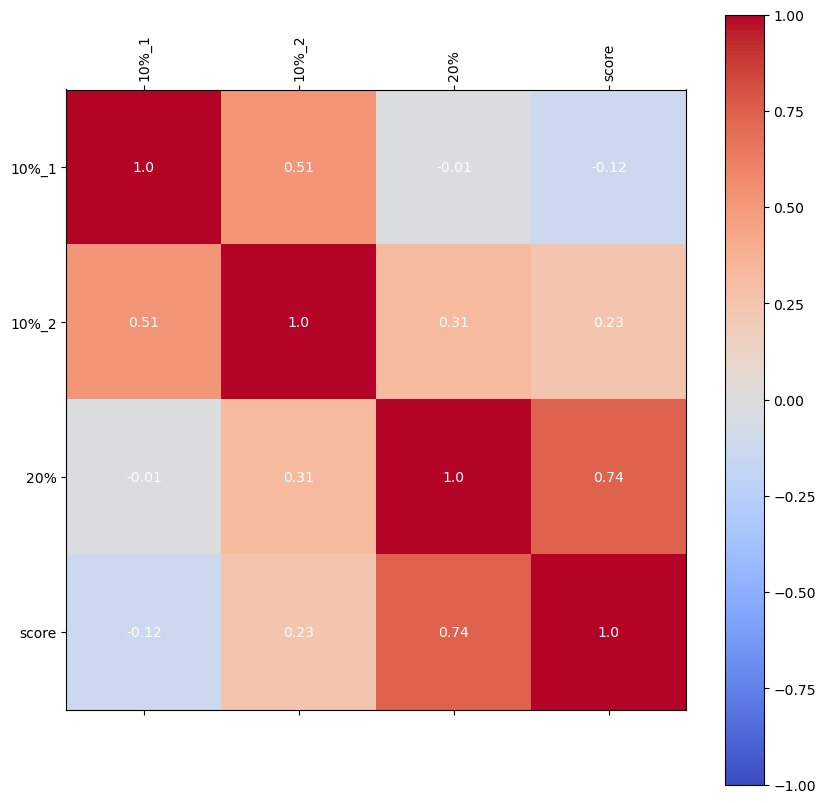

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
ax.set_xticklabels(df.columns)
plt.xticks(rotation = 90)
ax.set_yticklabels(df.columns)
ax.set_yticks(ticks)
#---print the correlation factor---
for i in range(df.shape[1]):
    for j in range(4):
        text = ax.text(j, i, round(corr.iloc[i][j],2),
        ha="center", va="center", color="w")
plt.show()

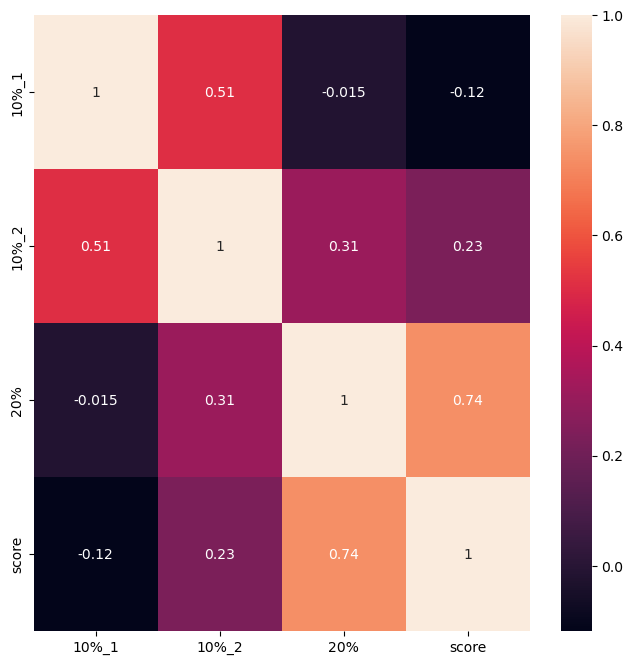

In [17]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)
#---get a reference to the current figure and set its size---
fig = plt.gcf()
fig.set_size_inches(8,8)

In [18]:
print(df.corr().nlargest(4, 'score').values[:,3])


[ 1.          0.73972991  0.23459822 -0.11894182]


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
# Features
X = df[['10%_1', '10%_2', '20%']]
# Target variable
y = df['score']
# Create a Linear Regression model
linear_reg = LinearRegression()
# Perform cross-validation
scores = cross_val_score(linear_reg, X, y, cv=10, scoring='neg_mean_squared_error')
mse = -scores.mean()
# Print the Mean Squared Error
print("Mean Squared Error:", mse)

Mean Squared Error: 0.4906637001170894


In [20]:
result = []
result.append(mse)

In [21]:
from sklearn.neighbors import KNeighborsRegressor
#---number of folds---
folds = 10
# Create a list of odd values for K
ks = list(range(1, int(len(X) * ((folds - 1) / folds)), 2))
# Cross-validate KNeighborsRegressor
cv_scores = []
for k in ks:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn_reg, X, y, cv=folds, scoring='neg_mean_squared_error')
    mse = -scores.mean()
    cv_scores.append(mse)
# Find the optimal K that gives the lowest MSE
optimal_k_index = cv_scores.index(min(cv_scores))
optimal_k = ks[optimal_k_index]
optimal_mse = min(cv_scores)
print(f"The optimal number of neighbors is {optimal_k}")
print(f"Mean Squared Error with optimal K: {optimal_mse}")
result.append(optimal_mse)


The optimal number of neighbors is 3
Mean Squared Error with optimal K: 0.5138031238990178


In [22]:
from sklearn.svm import SVR
# Create a Support Vector Regression (SVR) model with a linear kernel
linear_svr = SVR(kernel='linear')
# Cross-validate SVR
scores = cross_val_score(linear_svr, X, y, cv=10, scoring='neg_mean_squared_error')
mse = -scores.mean()
print(f"Mean Squared Error (SVR with linear kernel): {mse}")
result.append(mse)

Mean Squared Error (SVR with linear kernel): 0.5142993119916335


In [23]:
rbf = SVR(kernel='rbf')
rbf_scores = cross_val_score(rbf, X, y,
cv=10, scoring='neg_mean_squared_error').mean()
print(-rbf_scores)
result.append(-rbf_scores)

0.5095506145399122


In [24]:
knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(X, y)


KNeighborsRegressor(n_neighbors=3)

In [25]:
import pickle
#---save the model to disk---
filename = 'scores.sav'
#---write to the file using write and binary mode---
pickle.dump(knn, open(filename, 'wb'))
#---load the model from disk---
loaded_model = pickle.load(open(filename, 'rb'))
# s_10_1 = float(input("Nhập điểm 10%_1: "))
# s_10_2 = float(input("Nhập điểm 10%_2: "))
# s_20 = float(input("Nhập điểm 20%: "))
s_10_1 = float(7)
s_10_2 = float(6.5)
s_20 = float(7.5)
prediction = loaded_model.predict([[s_10_1, s_10_2, s_20]])
print("Điểm dự đoán: ", prediction[0])
print("Đánh giá mô hình: ", optimal_mse)

Điểm dự đoán:  8.0
Đánh giá mô hình:  0.5138031238990178


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [26]:
s_10_1 = float(7)
s_10_2 = float(6.5)
s_20 = float(7.5)
prediction = loaded_model.predict([[s_10_1, s_10_2, s_20]])
print("Điểm dự đoán: ", prediction[0])


Điểm dự đoán:  8.0


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [27]:
import pandas as pd
import numpy as np
df = pd.read_csv('./DATA_DIEMTHI/data_pttk.csv')
df['10%_1'] = df['10%_1'].replace(0, np.NaN)
df['10%_2'] = df['10%_2'].replace(0, np.NaN)
df['20%'] = df['20%'].replace(0, np.NaN)
df['score'] = df['score'].replace(0, np.NaN)
numeric_columns = ['10%_1', '10%_2', '20%', 'score']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
display(df)
X = df[['10%_1', '10%_2', '20%']]
y = df['score']


,10%_1,10%_2,20%,score
0,9.000000,7.000000,6.000000,6.000000
1,9.000000,7.000000,6.000000,6.000000
2,10.000000,9.000000,7.000000,7.250000
3,9.000000,7.000000,6.000000,6.000000
4,10.000000,8.000000,7.000000,7.500000
...,...,...,...,...
147,8.250000,7.750000,8.250000,8.000000
148,3.500000,3.250000,6.000000,6.500000
149,7.250000,6.500000,6.000000,6.500000
150,7.750000,3.500000,7.500000,7.500000


In [28]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
# Tách dữ liệu thành features (X) và target (y)
X = df[['10%_1', '10%_2', '20%']]
y = df['score']
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Xây dựng mô hình
model = tf.keras.Sequential([
tf.keras.layers.Input(shape=(3,)), # Số lượng đặc trưng
tf.keras.layers.Dense(1) # Layer Linear Regression
])
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')
# Huấn luyện mô hình
model.fit(X_train_scaled, y_train, epochs=2000, batch_size=32, verbose=1)

Epoch 1/2000
4/4 [==============================] - 0s 3ms/step - loss: 51.4690
Epoch 2/2000
4/4 [==============================] - 0s 2ms/step - loss: 51.3982
Epoch 3/2000
4/4 [==============================] - 0s 2ms/step - loss: 51.3235
Epoch 4/2000
4/4 [==============================] - 0s 2ms/step - loss: 51.2549
Epoch 5/2000
4/4 [==============================] - 0s 2ms/step - loss: 51.1831
Epoch 6/2000
4/4 [==============================] - 0s 2ms/step - loss: 51.1095
Epoch 7/2000
4/4 [==============================] - 0s 2ms/step - loss: 51.0441
Epoch 8/2000
4/4 [==============================] - 0s 2ms/step - loss: 50.9727
Epoch 9/2000
4/4 [==============================] - 0s 2ms/step - loss: 50.9077
Epoch 10/2000
4/4 [==============================] - 0s 2ms/step - loss: 50.8343
Epoch 11/2000
4/4 [==============================] - 0s 2ms/step - loss: 50.7688
Epoch 12/2000
4/4 [==============================] - 0s 2ms/step - loss: 50.7005
Epoch 13/2000
4/4 [==================

4/4 [==============================] - 0s 1ms/step - loss: 44.9762
Epoch 103/2000
4/4 [==============================] - 0s 1ms/step - loss: 44.9165
Epoch 104/2000
4/4 [==============================] - 0s 1ms/step - loss: 44.8602
Epoch 105/2000
4/4 [==============================] - 0s 1ms/step - loss: 44.7987
Epoch 106/2000
4/4 [==============================] - 0s 2ms/step - loss: 44.7400
Epoch 107/2000
4/4 [==============================] - 0s 1ms/step - loss: 44.6866
Epoch 108/2000
4/4 [==============================] - 0s 2ms/step - loss: 44.6249
Epoch 109/2000
4/4 [==============================] - 0s 2ms/step - loss: 44.5698
Epoch 110/2000
4/4 [==============================] - 0s 3ms/step - loss: 44.5103
Epoch 111/2000
4/4 [==============================] - 0s 3ms/step - loss: 44.4527
Epoch 112/2000
4/4 [==============================] - 0s 3ms/step - loss: 44.3967
Epoch 113/2000
4/4 [==============================] - 0s 3ms/step - loss: 44.3392
Epoch 114/2000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 39.5757
Epoch 203/2000
4/4 [==============================] - 0s 3ms/step - loss: 39.5241
Epoch 204/2000
4/4 [==============================] - 0s 2ms/step - loss: 39.4734
Epoch 205/2000
4/4 [==============================] - 0s 2ms/step - loss: 39.4231
Epoch 206/2000
4/4 [==============================] - 0s 3ms/step - loss: 39.3732
Epoch 207/2000
4/4 [==============================] - 0s 1ms/step - loss: 39.3224
Epoch 208/2000
4/4 [==============================] - 0s 1ms/step - loss: 39.2730
Epoch 209/2000
4/4 [==============================] - 0s 1ms/step - loss: 39.2223
Epoch 210/2000
4/4 [==============================] - 0s 1ms/step - loss: 39.1728
Epoch 211/2000
4/4 [==============================] - 0s 1ms/step - loss: 39.1220
Epoch 212/2000
4/4 [==============================] - 0s 1ms/step - loss: 39.0716
Epoch 213/2000
4/4 [==============================] - 0s 1ms/step - loss: 39.0228
Epoch 214/2000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 34.8336
Epoch 303/2000
4/4 [==============================] - 0s 996us/step - loss: 34.7887
Epoch 304/2000
4/4 [==============================] - 0s 1ms/step - loss: 34.7438
Epoch 305/2000
4/4 [==============================] - 0s 1ms/step - loss: 34.6994
Epoch 306/2000
4/4 [==============================] - 0s 1ms/step - loss: 34.6556
Epoch 307/2000
4/4 [==============================] - 0s 2ms/step - loss: 34.6100
Epoch 308/2000
4/4 [==============================] - 0s 4ms/step - loss: 34.5656
Epoch 309/2000
4/4 [==============================] - 0s 3ms/step - loss: 34.5219
Epoch 310/2000
4/4 [==============================] - 0s 3ms/step - loss: 34.4779
Epoch 311/2000
4/4 [==============================] - 0s 3ms/step - loss: 34.4323
Epoch 312/2000
4/4 [==============================] - 0s 3ms/step - loss: 34.3882
Epoch 313/2000
4/4 [==============================] - 0s 3ms/step - loss: 34.3454
Epoch 314/2000
4/4 [=========

4/4 [==============================] - 0s 2ms/step - loss: 30.5818
Epoch 403/2000
4/4 [==============================] - 0s 1ms/step - loss: 30.5412
Epoch 404/2000
4/4 [==============================] - 0s 1ms/step - loss: 30.5012
Epoch 405/2000
4/4 [==============================] - 0s 2ms/step - loss: 30.4606
Epoch 406/2000
4/4 [==============================] - 0s 1ms/step - loss: 30.4199
Epoch 407/2000
4/4 [==============================] - 0s 1ms/step - loss: 30.3805
Epoch 408/2000
4/4 [==============================] - 0s 2ms/step - loss: 30.3397
Epoch 409/2000
4/4 [==============================] - 0s 2ms/step - loss: 30.3006
Epoch 410/2000
4/4 [==============================] - 0s 1ms/step - loss: 30.2591
Epoch 411/2000
4/4 [==============================] - 0s 1ms/step - loss: 30.2191
Epoch 412/2000
4/4 [==============================] - 0s 2ms/step - loss: 30.1795
Epoch 413/2000
4/4 [==============================] - 0s 1ms/step - loss: 30.1392
Epoch 414/2000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 26.7300
Epoch 503/2000
4/4 [==============================] - 0s 2ms/step - loss: 26.6933
Epoch 504/2000
4/4 [==============================] - 0s 2ms/step - loss: 26.6572
Epoch 505/2000
4/4 [==============================] - 0s 2ms/step - loss: 26.6196
Epoch 506/2000
4/4 [==============================] - 0s 2ms/step - loss: 26.5831
Epoch 507/2000
4/4 [==============================] - 0s 2ms/step - loss: 26.5463
Epoch 508/2000
4/4 [==============================] - 0s 2ms/step - loss: 26.5098
Epoch 509/2000
4/4 [==============================] - 0s 3ms/step - loss: 26.4734
Epoch 510/2000
4/4 [==============================] - 0s 2ms/step - loss: 26.4373
Epoch 511/2000
4/4 [==============================] - 0s 3ms/step - loss: 26.4006
Epoch 512/2000
4/4 [==============================] - 0s 4ms/step - loss: 26.3639
Epoch 513/2000
4/4 [==============================] - 0s 2ms/step - loss: 26.3276
Epoch 514/2000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 23.2251
Epoch 603/2000
4/4 [==============================] - 0s 2ms/step - loss: 23.1915
Epoch 604/2000
4/4 [==============================] - 0s 2ms/step - loss: 23.1581
Epoch 605/2000
4/4 [==============================] - 0s 2ms/step - loss: 23.1250
Epoch 606/2000
4/4 [==============================] - 0s 2ms/step - loss: 23.0931
Epoch 607/2000
4/4 [==============================] - 0s 2ms/step - loss: 23.0584
Epoch 608/2000
4/4 [==============================] - 0s 2ms/step - loss: 23.0250
Epoch 609/2000
4/4 [==============================] - 0s 2ms/step - loss: 22.9920
Epoch 610/2000
4/4 [==============================] - 0s 2ms/step - loss: 22.9586
Epoch 611/2000
4/4 [==============================] - 0s 2ms/step - loss: 22.9259
Epoch 612/2000
4/4 [==============================] - 0s 2ms/step - loss: 22.8925
Epoch 613/2000
4/4 [==============================] - 0s 2ms/step - loss: 22.8595
Epoch 614/2000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 20.0398
Epoch 703/2000
4/4 [==============================] - 0s 2ms/step - loss: 20.0096
Epoch 704/2000
4/4 [==============================] - 0s 2ms/step - loss: 19.9800
Epoch 705/2000
4/4 [==============================] - 0s 2ms/step - loss: 19.9490
Epoch 706/2000
4/4 [==============================] - 0s 2ms/step - loss: 19.9187
Epoch 707/2000
4/4 [==============================] - 0s 2ms/step - loss: 19.8889
Epoch 708/2000
4/4 [==============================] - 0s 2ms/step - loss: 19.8590
Epoch 709/2000
4/4 [==============================] - 0s 2ms/step - loss: 19.8284
Epoch 710/2000
4/4 [==============================] - 0s 1ms/step - loss: 19.7981
Epoch 711/2000
4/4 [==============================] - 0s 1ms/step - loss: 19.7680
Epoch 712/2000
4/4 [==============================] - 0s 2ms/step - loss: 19.7379
Epoch 713/2000
4/4 [==============================] - 0s 2ms/step - loss: 19.7081
Epoch 714/2000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 17.1503
Epoch 803/2000
4/4 [==============================] - 0s 2ms/step - loss: 17.1229
Epoch 804/2000
4/4 [==============================] - 0s 2ms/step - loss: 17.0958
Epoch 805/2000
4/4 [==============================] - 0s 1ms/step - loss: 17.0683
Epoch 806/2000
4/4 [==============================] - 0s 2ms/step - loss: 17.0407
Epoch 807/2000
4/4 [==============================] - 0s 1ms/step - loss: 17.0134
Epoch 808/2000
4/4 [==============================] - 0s 2ms/step - loss: 16.9864
Epoch 809/2000
4/4 [==============================] - 0s 1ms/step - loss: 16.9589
Epoch 810/2000
4/4 [==============================] - 0s 2ms/step - loss: 16.9318
Epoch 811/2000
4/4 [==============================] - 0s 2ms/step - loss: 16.9043
Epoch 812/2000
4/4 [==============================] - 0s 2ms/step - loss: 16.8772
Epoch 813/2000
4/4 [==============================] - 0s 2ms/step - loss: 16.8498
Epoch 814/2000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 14.5413
Epoch 903/2000
4/4 [==============================] - 0s 2ms/step - loss: 14.5167
Epoch 904/2000
4/4 [==============================] - 0s 2ms/step - loss: 14.4918
Epoch 905/2000
4/4 [==============================] - 0s 2ms/step - loss: 14.4672
Epoch 906/2000
4/4 [==============================] - 0s 2ms/step - loss: 14.4424
Epoch 907/2000
4/4 [==============================] - 0s 2ms/step - loss: 14.4177
Epoch 908/2000
4/4 [==============================] - 0s 2ms/step - loss: 14.3935
Epoch 909/2000
4/4 [==============================] - 0s 2ms/step - loss: 14.3692
Epoch 910/2000
4/4 [==============================] - 0s 2ms/step - loss: 14.3442
Epoch 911/2000
4/4 [==============================] - 0s 2ms/step - loss: 14.3197
Epoch 912/2000
4/4 [==============================] - 0s 2ms/step - loss: 14.2953
Epoch 913/2000
4/4 [==============================] - 0s 2ms/step - loss: 14.2707
Epoch 914/2000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 12.1987
Epoch 1003/2000
4/4 [==============================] - 0s 2ms/step - loss: 12.1768
Epoch 1004/2000
4/4 [==============================] - 0s 2ms/step - loss: 12.1547
Epoch 1005/2000
4/4 [==============================] - 0s 2ms/step - loss: 12.1329
Epoch 1006/2000
4/4 [==============================] - 0s 2ms/step - loss: 12.1106
Epoch 1007/2000
4/4 [==============================] - 0s 2ms/step - loss: 12.0885
Epoch 1008/2000
4/4 [==============================] - 0s 2ms/step - loss: 12.0666
Epoch 1009/2000
4/4 [==============================] - 0s 2ms/step - loss: 12.0445
Epoch 1010/2000
4/4 [==============================] - 0s 2ms/step - loss: 12.0226
Epoch 1011/2000
4/4 [==============================] - 0s 2ms/step - loss: 12.0009
Epoch 1012/2000
4/4 [==============================] - 0s 2ms/step - loss: 11.9789
Epoch 1013/2000
4/4 [==============================] - 0s 2ms/step - loss: 11.9569
Epoch 1014/2000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 10.1508
Epoch 1101/2000
4/4 [==============================] - 0s 2ms/step - loss: 10.1310
Epoch 1102/2000
4/4 [==============================] - 0s 2ms/step - loss: 10.1117
Epoch 1103/2000
4/4 [==============================] - 0s 1ms/step - loss: 10.0921
Epoch 1104/2000
4/4 [==============================] - 0s 2ms/step - loss: 10.0725
Epoch 1105/2000
4/4 [==============================] - 0s 2ms/step - loss: 10.0528
Epoch 1106/2000
4/4 [==============================] - 0s 2ms/step - loss: 10.0332
Epoch 1107/2000
4/4 [==============================] - 0s 2ms/step - loss: 10.0135
Epoch 1108/2000
4/4 [==============================] - 0s 1ms/step - loss: 9.9942
Epoch 1109/2000
4/4 [==============================] - 0s 2ms/step - loss: 9.9748
Epoch 1110/2000
4/4 [==============================] - 0s 2ms/step - loss: 9.9551
Epoch 1111/2000
4/4 [==============================] - 0s 2ms/step - loss: 9.9359
Epoch 1112/2000
4/4 [===

4/4 [==============================] - 0s 2ms/step - loss: 8.3036
Epoch 1201/2000
4/4 [==============================] - 0s 2ms/step - loss: 8.2863
Epoch 1202/2000
4/4 [==============================] - 0s 2ms/step - loss: 8.2690
Epoch 1203/2000
4/4 [==============================] - 0s 2ms/step - loss: 8.2520
Epoch 1204/2000
4/4 [==============================] - 0s 2ms/step - loss: 8.2347
Epoch 1205/2000
4/4 [==============================] - 0s 2ms/step - loss: 8.2177
Epoch 1206/2000
4/4 [==============================] - 0s 1ms/step - loss: 8.2002
Epoch 1207/2000
4/4 [==============================] - 0s 1ms/step - loss: 8.1833
Epoch 1208/2000
4/4 [==============================] - 0s 2ms/step - loss: 8.1663
Epoch 1209/2000
4/4 [==============================] - 0s 2ms/step - loss: 8.1492
Epoch 1210/2000
4/4 [==============================] - 0s 2ms/step - loss: 8.1321
Epoch 1211/2000
4/4 [==============================] - 0s 2ms/step - loss: 8.1152
Epoch 1212/2000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 6.6906
Epoch 1301/2000
4/4 [==============================] - 0s 2ms/step - loss: 6.6754
Epoch 1302/2000
4/4 [==============================] - 0s 2ms/step - loss: 6.6605
Epoch 1303/2000
4/4 [==============================] - 0s 2ms/step - loss: 6.6455
Epoch 1304/2000
4/4 [==============================] - 0s 2ms/step - loss: 6.6306
Epoch 1305/2000
4/4 [==============================] - 0s 2ms/step - loss: 6.6159
Epoch 1306/2000
4/4 [==============================] - 0s 2ms/step - loss: 6.6010
Epoch 1307/2000
4/4 [==============================] - 0s 2ms/step - loss: 6.5862
Epoch 1308/2000
4/4 [==============================] - 0s 2ms/step - loss: 6.5711
Epoch 1309/2000
4/4 [==============================] - 0s 1ms/step - loss: 6.5566
Epoch 1310/2000
4/4 [==============================] - 0s 2ms/step - loss: 6.5417
Epoch 1311/2000
4/4 [==============================] - 0s 2ms/step - loss: 6.5270
Epoch 1312/2000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 5.3013
Epoch 1401/2000
4/4 [==============================] - 0s 2ms/step - loss: 5.2885
Epoch 1402/2000
4/4 [==============================] - 0s 2ms/step - loss: 5.2759
Epoch 1403/2000
4/4 [==============================] - 0s 2ms/step - loss: 5.2633
Epoch 1404/2000
4/4 [==============================] - 0s 2ms/step - loss: 5.2503
Epoch 1405/2000
4/4 [==============================] - 0s 2ms/step - loss: 5.2374
Epoch 1406/2000
4/4 [==============================] - 0s 2ms/step - loss: 5.2249
Epoch 1407/2000
4/4 [==============================] - 0s 2ms/step - loss: 5.2122
Epoch 1408/2000
4/4 [==============================] - 0s 2ms/step - loss: 5.1994
Epoch 1409/2000
4/4 [==============================] - 0s 1ms/step - loss: 5.1868
Epoch 1410/2000
4/4 [==============================] - 0s 2ms/step - loss: 5.1744
Epoch 1411/2000
4/4 [==============================] - 0s 2ms/step - loss: 5.1617
Epoch 1412/2000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 4.1230
Epoch 1501/2000
4/4 [==============================] - 0s 2ms/step - loss: 4.1121
Epoch 1502/2000
4/4 [==============================] - 0s 2ms/step - loss: 4.1012
Epoch 1503/2000
4/4 [==============================] - 0s 2ms/step - loss: 4.0908
Epoch 1504/2000
4/4 [==============================] - 0s 2ms/step - loss: 4.0800
Epoch 1505/2000
4/4 [==============================] - 0s 2ms/step - loss: 4.0692
Epoch 1506/2000
4/4 [==============================] - 0s 2ms/step - loss: 4.0585
Epoch 1507/2000
4/4 [==============================] - 0s 2ms/step - loss: 4.0479
Epoch 1508/2000
4/4 [==============================] - 0s 2ms/step - loss: 4.0374
Epoch 1509/2000
4/4 [==============================] - 0s 2ms/step - loss: 4.0268
Epoch 1510/2000
4/4 [==============================] - 0s 2ms/step - loss: 4.0160
Epoch 1511/2000
4/4 [==============================] - 0s 2ms/step - loss: 4.0058
Epoch 1512/2000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 3.1437
Epoch 1601/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.1350
Epoch 1602/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.1261
Epoch 1603/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.1174
Epoch 1604/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.1086
Epoch 1605/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.0997
Epoch 1606/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.0911
Epoch 1607/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.0825
Epoch 1608/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.0736
Epoch 1609/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.0649
Epoch 1610/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.0564
Epoch 1611/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.0476
Epoch 1612/2000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 2.3509
Epoch 1701/2000
4/4 [==============================] - 0s 2ms/step - loss: 2.3437
Epoch 1702/2000
4/4 [==============================] - 0s 2ms/step - loss: 2.3366
Epoch 1703/2000
4/4 [==============================] - 0s 2ms/step - loss: 2.3296
Epoch 1704/2000
4/4 [==============================] - 0s 2ms/step - loss: 2.3226
Epoch 1705/2000
4/4 [==============================] - 0s 2ms/step - loss: 2.3157
Epoch 1706/2000
4/4 [==============================] - 0s 2ms/step - loss: 2.3087
Epoch 1707/2000
4/4 [==============================] - 0s 2ms/step - loss: 2.3017
Epoch 1708/2000
4/4 [==============================] - 0s 2ms/step - loss: 2.2948
Epoch 1709/2000
4/4 [==============================] - 0s 2ms/step - loss: 2.2878
Epoch 1710/2000
4/4 [==============================] - 0s 2ms/step - loss: 2.2809
Epoch 1711/2000
4/4 [==============================] - 0s 2ms/step - loss: 2.2741
Epoch 1712/2000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 1.7270
Epoch 1801/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.7215
Epoch 1802/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.7161
Epoch 1803/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.7108
Epoch 1804/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.7053
Epoch 1805/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.6999
Epoch 1806/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.6946
Epoch 1807/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.6893
Epoch 1808/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.6840
Epoch 1809/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.6786
Epoch 1810/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.6734
Epoch 1811/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.6679
Epoch 1812/2000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 1.2559
Epoch 1901/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.2518
Epoch 1902/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.2480
Epoch 1903/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.2437
Epoch 1904/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.2399
Epoch 1905/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.2359
Epoch 1906/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.2319
Epoch 1907/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.2280
Epoch 1908/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.2241
Epoch 1909/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.2201
Epoch 1910/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.2162
Epoch 1911/2000
4/4 [==============================] - 0s 3ms/step - loss: 1.2122
Epoch 1912/2000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.9159


In [30]:
# Nhập dữ liệu từ người dùng để dự đoán
input_data = []
for i in range(3):
    value = float(input(f"Nhập giá trị cho đặc trưng {X.columns[i]}: "))
    input_data.append(value)
# Chuẩn hóa dữ liệu đầu vào
input_data_scaled = scaler.transform([input_data])
# Dự đoán điểm số
predicted_score = model.predict(input_data_scaled)[0][0]
print(f"Dự đoán điểm số: {predicted_score:.2f}")
# Đánh giá mô hình
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Nhập giá trị cho đặc trưng 10%_1: 10
Nhập giá trị cho đặc trưng 10%_2: 10
Nhập giá trị cho đặc trưng 20%: 10
1/1 [==============================] - 0s 62ms/step
Dự đoán điểm số: 9.04
1/1 [==============================] - 0s 18ms/step
Mean Squared Error: 0.9821232300110015


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
import uvicorn
import pickle
import numpy as np
from pydantic import BaseModel
from fastapi import FastAPI
class Features(BaseModel):
    score_1: float
    score_2: float
    score_3: float
app = FastAPI()
filename1 = "./scores.sav"
filename2 = "./linear.sav"
loaded_model1 = pickle.load(open(filename1, "rb"))
loaded_model2 = pickle.load(open(filename2, "rb"))
@app.get("/")
def index():
    return "Hello world!"
@app.post("/score/v1/predict/knregression")
def knregression(features: Features):
    features_arr = np.array([features.score_1, features.score_2, features.score_3])
    prediction = loaded_model1.predict([features_arr])
    response = {"prediction": prediction[0]}
return response
@app.post("/score/v1/predict/linear")
def linear(features: Features):
    features_arr = np.array([features.score_1, features.score_2, features.score_3])
    prediction = loaded_model2.predict([features_arr])
    response = {"prediction": prediction[0]}
    return response
if __name__ == "__main__":
    uvicorn.run(app,host="localhost",port=8000,reload=True)

ModuleNotFoundError: No module named 'uvicorn'

In [32]:
!pip install uvicorn



  Obtaining dependency information for uvicorn from https://files.pythonhosted.org/packages/7e/17/4b7a76fffa7babf397481040d8aef2725b2b81ae19f1a31b5ca0c17d49e6/uvicorn-0.24.0.post1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/58.3 kB ? eta -:--:--
     ------- -------------------------------- 10.2/58.3 kB ? eta -:--:--
     -------------------------------------- 58.3/58.3 kB 774.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
   ---------------------------------------- 59.7/59.7 kB 3.3 MB/s eta 0:00:00


In [36]:
import uvicorn
import pickle
import numpy as np
from pydantic import BaseModel
from fastapi import FastAPI
class Features(BaseModel):
    score_1: float
    score_2: float
    score_3: float
app = FastAPI()
filename1 = "./scores.sav"
filename2 = "./linear.sav"
loaded_model1 = pickle.load(open(filename1, "rb"))
loaded_model2 = pickle.load(open(filename2, "rb"))
@app.get("/")
def index():
    return "Hello world!"
@app.post("/score/v1/predict/knregression")
def knregression(features: Features):
    features_arr = np.array([features.score_1, features.score_2, features.score_3])
    prediction = loaded_model1.predict([features_arr])
    response = {"prediction": prediction[0]}
return response
@app.post("/score/v1/predict/linear")
def linear(features: Features):
    features_arr = np.array([features.score_1, features.score_2, features.score_3])
    prediction = loaded_model2.predict([features_arr])
    response = {"prediction": prediction[0]}
    return response
if __name__ == "__main__":
    uvicorn.run(app,host="localhost",port=8000,reload=True)

ImportError: cannot import name 'Doc' from 'typing_extensions' (C:\Users\Admin\anaconda3\Lib\site-packages\typing_extensions.py)

In [34]:
!pip install fastapi


  Obtaining dependency information for fastapi from https://files.pythonhosted.org/packages/f3/4f/0ce34195b63240b6693086496c9bab4ef23999112184399a3e88854c7674/fastapi-0.104.1-py3-none-any.whl.metadata
  Obtaining dependency information for anyio<4.0.0,>=3.7.1 from https://files.pythonhosted.org/packages/19/24/44299477fe7dcc9cb58d0a57d5a7588d6af2ff403fdd2d47a246c91a3246/anyio-3.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for starlette<0.28.0,>=0.27.0 from https://files.pythonhosted.org/packages/58/f8/e2cca22387965584a409795913b774235752be4176d276714e15e1a58884/starlette-0.27.0-py3-none-any.whl.metadata
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/24/21/7d397a4b7934ff4028987914ac1044d3b7d52712f30e2ac7a2ae5bc86dd0/typing_extensions-4.8.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/92.9 kB ? eta -:--:--
   ----------------- ---------------------- 41.0/92.9 kB 991.0 kB/s eta 0: